:بررسی اولیه داده ها

In [4]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.stats import zscore
from scipy.special import rel_entr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from rapidfuzz import fuzz, process

In [5]:
adults = pd.read_csv("adult.csv")
adults_raw = adults.copy()
print("................Columns...............\n", adults.columns.unique())
print("\n................First Row.............", adults.iloc[0])
print("\n................", adults.shape,"................")
print(adults_raw.dtypes)

................Columns...............
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

................First Row............. age                         154
workclass                   NaN
fnlwgt                  77516.0
education             Bachelors
education-num              13.0
marital-status              NaN
occupation         Adm-clerical
relationship      Not-in-family
race                        NaN
sex                         NaN
capital-gain             2174.0
capital-loss                0.0
hours-per-week              NaN
native-country              270
income                    <=50K
Name: 0, dtype: object

................ (50064, 15) ................
age                object
workclass          object
fnlwgt            float64
education          object
education-num 

In [6]:
print(".................Dataset Info....................")
print(adults.info())
print(".................Numeric Describe................")
print(adults.describe())
print(".................Text Describe...................")
print(adults.describe(include='object'))

.................Dataset Info....................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50064 entries, 0 to 50063
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             47570 non-null  object 
 1   workclass       38154 non-null  object 
 2   fnlwgt          37383 non-null  float64
 3   education       38128 non-null  object 
 4   education-num   38468 non-null  object 
 5   marital-status  38105 non-null  object 
 6   occupation      38097 non-null  object 
 7   relationship    38119 non-null  object 
 8   race            38102 non-null  object 
 9   sex             38170 non-null  object 
 10  capital-gain    50063 non-null  object 
 11  capital-loss    45282 non-null  float64
 12  hours-per-week  37400 non-null  float64
 13  native-country  38134 non-null  object 
 14  income          50063 non-null  object 
dtypes: float64(3), object(12)
memory usage: 5.7+ MB
None
.................N

.................Missing Values....................
age                2494
workclass         11910
fnlwgt            12681
education         11936
education-num     11596
marital-status    11959
occupation        11967
relationship      11945
race              11962
sex               11894
capital-gain          1
capital-loss       4782
hours-per-week    12664
native-country    11930
income                1
dtype: int64
.................Duplicate Values....................

................Number of duplicate rows: 1229 ..................

.................Outlier Values....................


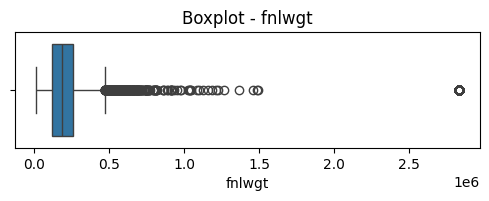

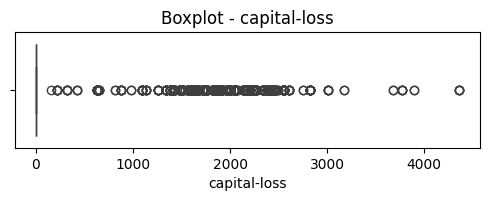

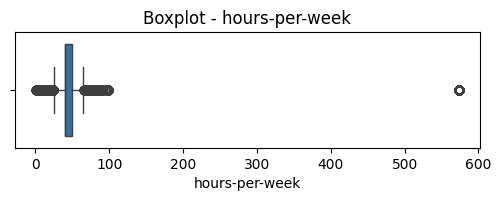

.................Noisy Values....................

............unique data:'sex'
[nan 'Male' 'Female' 'nwn' 'Maje' 'Femalh' '495' '478' '560' 'Malc'
 'demale' '995' 'memale' '342' 'ndn' '129' 'Mfle' 'Malg' '686' '221' '789'
 'ian' 'Mqle' '278' 'Femnle' 'Malr' '683' '316' 'Femabe' '494' 'aale'
 '397' 'dale' '301' 'Femalc' '856' '804' '755' 'Maqe' 'tale' '938' 'zan'
 'Mrle' '538' 'nzn' 'cale' '299' '442' '636' 'Malq' '107' 'Malv' '628'
 'Mcle' '428' 'Fjmale' 'Femalx' 'tan' 'Mwle' 'Fmmale' '183' 'fan' 'gemale'
 'Femaqe' 'nas' 'qan' 'Mase' 'Femalb' '418' '894' '908' '524' '893' 'njn'
 '650' '543' 'Femlle' 'Mall' '245' '313' 'xale' 'Fimale' 'Mace' 'nae'
 '850' 'Mole' '292' '539' 'naq' '163' '429' 'Maye' 'wale' 'Malm' '104'
 'Femaxe' '497' '186' 'Mala' '788' 'han' '438' 'jale' '901' 'Fexale'
 'Fomale' 'Mahe' 'kan' 'Mane' '194' '191' '665' '376' 'Fejale' '631'
 'Mafe' '592' 'Femple' '528' 'nln' 'pan' 'nxn' 'Mile' '339' '491' 'lale'
 'Mxle' '888' '726' '260' 'Mali' '206' '591' '684' 'vale' '62

In [7]:
print(".................Missing Values....................")
print(adults.isnull().sum())

print(".................Duplicate Values....................")
duplicate_rows = adults[adults.duplicated()]
print("\n................Number of duplicate rows:", len(duplicate_rows), "..................")

print("\n.................Outlier Values....................")
numeric_cols = adults.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(data=adults, x=col)
    plt.title(f"Boxplot - {col}")
    plt.show()

print(".................Noisy Values....................")
def show_unique(col):
    print(f"\n............unique data:'{col}'")
    print(adults[col].unique())
for col in ['sex', 'income', 'education', 'workclass', 'marital-status']:
    show_unique(col)

print(".................Incorrectly Formatted Data....................")
for col in adults.columns:
    if adults[col].dtype == object:
        try:
            adults[col].astype(float)
        except:
            continue
        print(f"{col}")

print(".................empty data with special characters....................")
for col in adults.columns:
    print(f"{col}: {(adults[col] == '?').sum()} ")

In [8]:
original_adults = adults.copy()

def check_validity(col, values):
    known_valid = {
        'sex': ['Male', 'Female'],
        'income': ['<=50K', '>50K'],
        'education': [
            'Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school',
            'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters',
            '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'
        ]
    }
    if col in known_valid:
        return values.isin(known_valid[col]).mean() * 100
    return None


quality_adults = pd.DataFrame({
    'feature_name': adults.columns,
    'record_count': len(adults), 
    'null_values': [adults[col].isnull().sum() for col in adults.columns],
    'accuracy': 100,
    'completeness': [100 * adults[col].notnull().sum() / len(adults) for col in adults.columns],
    'validity': [check_validity(col, adults[col]) for col in adults.columns],
    'consistency': 100,
    'currentness': None
})

quality_adults.head(20)

,feature_name,record_count,null_values,accuracy,completeness,validity,consistency,currentness
0,age,50064,2494,100,95.018376,NaN,100,None
1,workclass,50064,11910,100,76.210451,NaN,100,None
2,fnlwgt,50064,12681,100,74.670422,NaN,100,None
3,education,50064,11936,100,76.158517,71.310722,100,None
4,education-num,50064,11596,100,76.837648,NaN,100,None
5,marital-status,50064,11959,100,76.112576,NaN,100,None
6,occupation,50064,11967,100,76.096596,NaN,100,None
7,relationship,50064,11945,100,76.140540,NaN,100,None
8,race,50064,11962,100,76.106584,NaN,100,None
9,sex,50064,11894,100,76.242410,71.360658,100,None


...........نمایش هیستوگرام برای ستون‌های عددی................


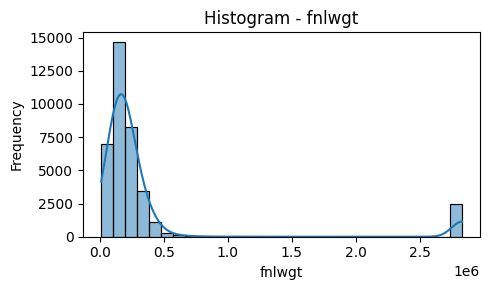

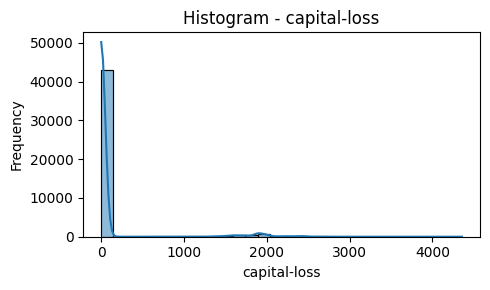

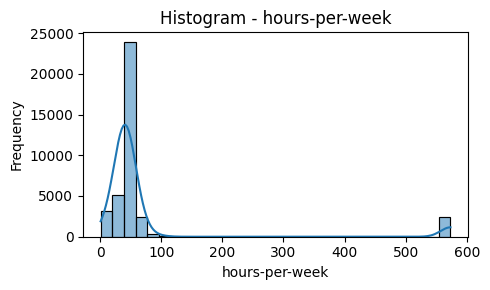

..................باکس‌ پلات برای هر ویژگی عددی................


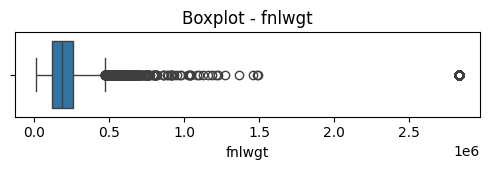

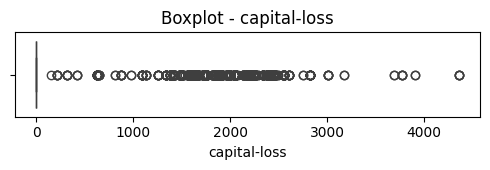

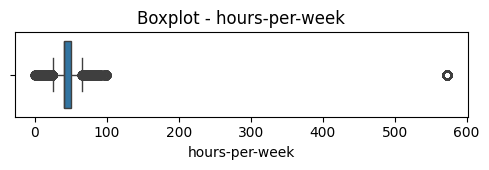

..................Scatter Plot بین هر دو ستون عددی............


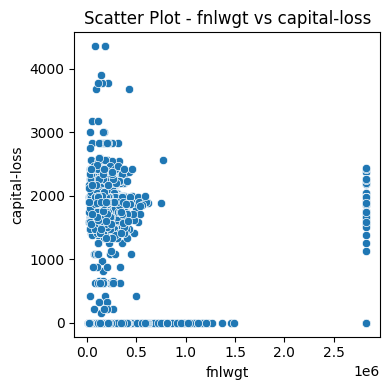

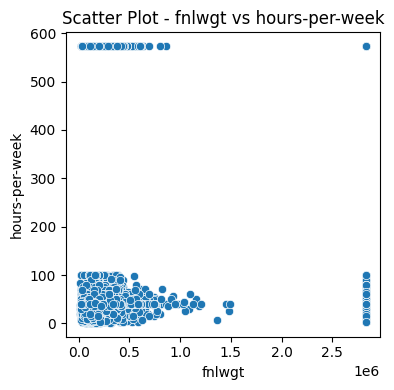

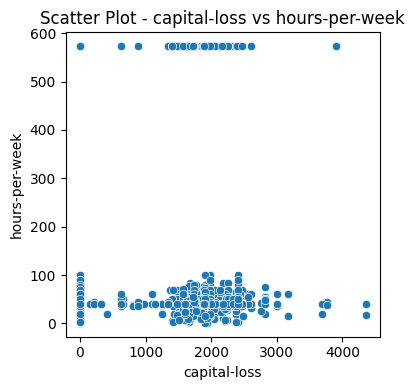

...............Pairplot برای تمام ویژگی‌های عددی...............


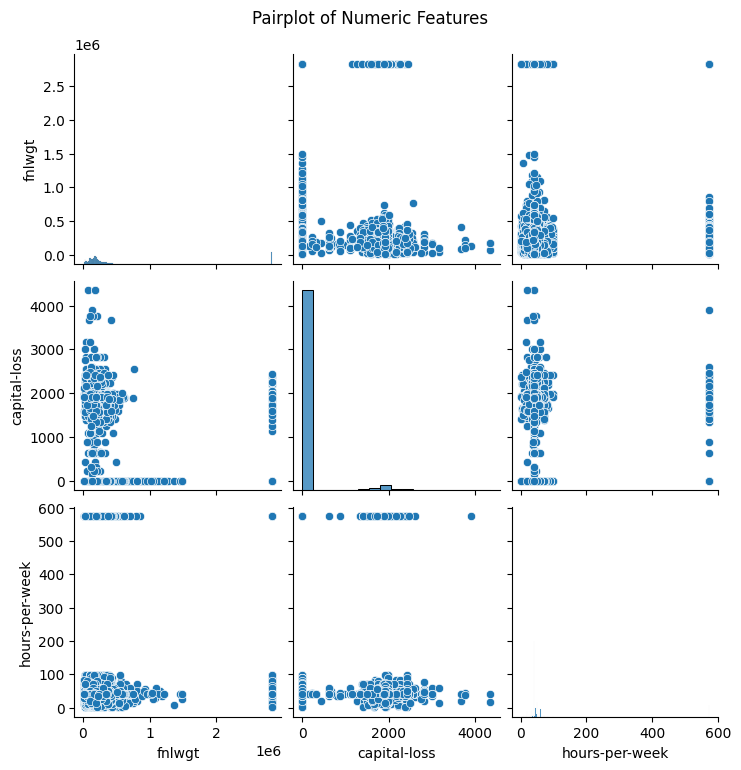

In [9]:
numeric_cols = adults.select_dtypes(include=np.number).columns

print("...........نمایش هیستوگرام برای ستون‌های عددی................")
for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=adults, x=col, bins=30, kde=True)
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

print("..................باکس‌ پلات برای هر ویژگی عددی................")
for col in numeric_cols:
    plt.figure(figsize=(5, 1.8))
    sns.boxplot(data=adults, x=col)
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
    plt.show()

print("..................Scatter Plot بین هر دو ستون عددی............")
from itertools import combinations
for col1, col2 in combinations(numeric_cols, 2):
    plt.figure(figsize=(4, 4))
    sns.scatterplot(data=adults, x=col1, y=col2)
    plt.title(f"Scatter Plot - {col1} vs {col2}")
    plt.tight_layout()
    plt.show()

print("...............Pairplot برای تمام ویژگی‌های عددی...............")
sns.pairplot(adults[numeric_cols])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

In [10]:
print("...........بررسی توزیع داده‌ها برای هر ستون عددی.............")

for col in numeric_cols:
    col_data = adults[col].dropna()
    skew_val = skew(col_data)
    kurt_val = kurtosis(col_data)
    
    print(f"ستون: {col}")
    print(f"Skewness (چولگی): {skew_val:.2f} → {'راست‌چوله' if skew_val > 0 else 'چپ‌چوله' if skew_val < 0 else 'نرمال'}")
    print(f"Kurtosis (کشیدگی): {kurt_val:.2f}")
    print("-" * 40)

...........بررسی توزیع داده‌ها برای هر ستون عددی.............
ستون: fnlwgt
Skewness (چولگی): 3.38 → راست‌چوله
Kurtosis (کشیدگی): 9.73
----------------------------------------
ستون: capital-loss
Skewness (چولگی): 4.32 → راست‌چوله
Kurtosis (کشیدگی): 17.74
----------------------------------------
ستون: hours-per-week
Skewness (چولگی): 3.46 → راست‌چوله
Kurtosis (کشیدگی): 10.12
----------------------------------------


In [11]:
#Initial Problem Checklist Table
checklist = pd.DataFrame({
    'feature': adults.columns,
    'missing_values': [adults[col].isnull().sum() for col in adults.columns],
    'question_marks': [(adults[col] == '?').sum() for col in adults.columns],
    'num_unique_values': [adults[col].nunique() for col in adults.columns],
    'dtype': [adults[col].dtype for col in adults.columns]
})

print(".................Checklist Table....................")
print(checklist)

.................Checklist Table....................
           feature  missing_values  question_marks  num_unique_values    dtype
0              age            2494               0                 76   object
1        workclass           11910            2095               1090   object
2           fnlwgt           12681               0              22449  float64
3        education           11936               0               1379   object
4    education-num           11596               0                 18   object
5   marital-status           11959               0               1380   object
6       occupation           11967            2118               1532   object
7     relationship           11945               0               1311   object
8             race           11962               0                909   object
9              sex           11894               0                905   object
10    capital-gain               1               0                124   object

:پیش پردازش داده ها

In [12]:
adults.replace('?', np.nan, inplace=True)

# نمایش تعداد مقادیر گمشده در هر ستون
print("مقادیر گمشده قبل از جایگزینی:")
print(adults.isnull().sum())

# جایگزینی مقادیر گمشده با مقدار پرتکرار در هر ستون
for col in adults.columns:
    if adults[col].isnull().sum() > 0:
        adults[col].fillna(adults[col].mode()[0], inplace=True)


print("\nمقادیر گمشده بعد از جایگزینی:")
print(adults.isnull().sum())

مقادیر گمشده قبل از جایگزینی:
age                2494
workclass         14005
fnlwgt            12681
education         11936
education-num     11596
marital-status    11959
occupation        14085
relationship      11945
race              11962
sex               11894
capital-gain          1
capital-loss       4782
hours-per-week    12664
native-country    12569
income                1
dtype: int64

مقادیر گمشده بعد از جایگزینی:


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16364\911069666.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adults[col].fillna(adults[col].mode()[0], inplace=True)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [13]:
print(adults.dtypes)

age                object
workclass          object
fnlwgt            float64
education          object
education-num      object
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain       object
capital-loss      float64
hours-per-week    float64
native-country     object
income             object
dtype: object


In [14]:
numeric_cols = ['age', 'education-num', 'capital-gain']

for col in numeric_cols:
    adults[col] = pd.to_numeric(adults[col], errors='coerce')

In [15]:
print(adults.dtypes)

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income             object
dtype: object


In [16]:
# جایگزینی مقادیر گمشده عددی با میانگین همان ستون
adults[numeric_cols] = adults[numeric_cols].fillna(adults[numeric_cols].mean())

In [17]:
# لیست ستون‌های عددی
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# بررسی وجود مقدار گمشده در این ستون‌ها
print("مقدارهای گمشده در ستون‌های عددی:")
print(adults[numeric_cols].isnull().sum())

# محاسبه z-score فقط برای ستون‌های عددی
z_scores = zscore(adults[numeric_cols])

# بررسی وجود NaN در z_scores
print("\nمقدارهای NaN در Z-score:")
print(pd.DataFrame(z_scores, columns=numeric_cols).isnull().sum())

# حذف داده‌هایی که مقدار مطلق z-score در همه ستون‌ها کمتر از 3 باشه
mask = (abs(z_scores) < 3)
filtered_df = adults[mask.all(axis=1)]

# بررسی خروجی
print("\nتعداد داده‌ها قبل از حذف:", adults.shape[0])
print("تعداد داده‌ها بعد از حذف:", filtered_df.shape[0])

مقدارهای گمشده در ستون‌های عددی:
age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

مقدارهای NaN در Z-score:
age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

تعداد داده‌ها قبل از حذف: 50064
تعداد داده‌ها بعد از حذف: 39865


In [18]:
# استخراج ستون‌های غیرعددی
categorical_cols = adults.select_dtypes(include='object').columns

# نمایش مقادیر یکتا در هر ستون برای شناسایی موارد مشکوک
for col in categorical_cols:
    print(f"\n{col}:")
    print(adults[col].value_counts())


workclass:


workclass
Private             38917
Self-emp-not-inc     2784
Local-gov            2288
State-gov            1399
Self-emp-inc         1231
                    ...  
Selw-emp-inc            1
tocal-gov               1
Lokal-gov               1
949                     1
181                     1
Name: count, Length: 1089, dtype: int64

education:
education
HS-grad         23499
Some-college     7882
Bachelors        5890
Masters          1937
Assoc-voc        1511
                ...  
672                 1
620                 1
274                 1
HS-grac             1
Assocovoc           1
Name: count, Length: 1379, dtype: int64

marital-status:
marital-status
Married-civ-spouse    28296
Never-married         11767
Divorced               4887
Widowed                1108
Separated              1097
                      ...  
rever-married             1
Married-miv-spouse        1
Divormed                  1
577                       1
780                       1
Name: count, Length:

In [19]:
text_columns = adults_clean.select_dtypes(include='object').columns.tolist()
print("ستون‌های متنی:", text_columns)

NameError: name 'adults_clean' is not defined

In [675]:
# اعمال فقط روی ستون‌های متنی (object)
for col in adults_clean.select_dtypes(include='object').columns:
    def convert_numeric_to_nan(x):
        if isinstance(x, str) and x.strip().isdigit():
            return np.nan
        return x

    adults_clean[col] = adults_clean[col].apply(convert_numeric_to_nan)


In [676]:

# لیست ستون‌های مورد نظر
target_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

# تابع پاک‌سازی: کلمات دقیقاً ۳ حرفی یا اعداد رو حذف می‌کنه
def clean_value(val):
    if isinstance(val, str):
        val = val.strip()
        if val.isdigit():  # اگر عدد هست مثل '625'
            return np.nan
        elif re.fullmatch(r'[A-Za-z]{3}', val):  # اگر فقط شامل سه حرف باشه مثل 'The'
            return np.nan
    return val

# اعمال روی ستون‌های هدف
for col in target_columns:
    adults_clean[col] = adults_clean[col].apply(clean_value)


In [ ]:

def clean_sex_column(value):
    if isinstance(value, str):
        value = value.strip().title()  # نرمال‌سازی اولیه
        if len(value) == 4:
            return 'Male'
        elif len(value) == 5:
            return 'Female'
        elif value in ['Male', 'Female']:  # اگر خودش درسته
            return value
    return np.nan  # هر چیز دیگه‌ای تبدیل بشه به np.nan

# اعمال تابع به ستون 'sex'
adults_clean['sex'] = adults_clean['sex'].apply(clean_sex_column)

In [677]:
# دیکشنری تصحیح داده‌های ناسازگار برای هر ستون
corrections = {
    'workclass': {
        'Selw-emp-inc': 'Self-emp-inc',
        'jelf-emp-inc': 'Self-emp-inc',
        'Self-mmp-inc': 'Self-emp-inc',
        'Selp-emp-inc': 'Self-emp-inc',
        'Self-emp-not-ing': 'Self-emp-not-inc',
        'Self-emp-noq-inc': 'Self-emp-not-inc',
        'Self-eyp-not-inc': 'Self-emp-not-inc',
        'Self-emp-nok-inc': 'Self-emp-not-inc',
        'Sehf-emp-not-inc': 'Self-emp-not-inc',
        'tocal-gov': 'Local-gov',
        'Lokal-gov': 'Local-gov',
        'xocal-gov': 'Local-gov',
        'Localmgov': 'Local-gov',
        'State-gjv': 'State-gov',
        'Stafe-gov': 'State-gov',
        'Stare-gov': 'State-gov',
        'Statehgov': 'State-gov',
        'Federrl-gov': 'Federal-gov',
        'Federalugov': 'Federal-gov',
        'Pryvate': 'Private',
        'Privatc': 'Private',
        'Prevate': 'Private',
        'Privaoe': 'Private',
        '116': np.nan,
        '693': np.nan,
        '279': np.nan,
        '955': np.nan,
        '360': np.nan,
        '872': np.nan,
        '699': np.nan,
        '513': np.nan,
        '267': np.nan,
        '969': np.nan,
        '591': np.nan,
        '725': np.nan,
        '394': np.nan,
        '664': np.nan,
        '949': np.nan,
        '181': np.nan,
        '300': np.nan,
        '659': np.nan,
        '171': np.nan,
        '606': np.nan,
        '671': np.nan,
        '361': np.nan,
        '644': np.nan,
        '654': np.nan
    },
    'education': {
        'HS-grac': 'HS-grad',
        'HS-erad': 'HS-grad',
        'tS-grad': 'HS-grad',
        'yS-grad': 'HS-grad',
        'HS-grud': 'HS-grad',
        'Assocovoc': 'Assoc-voc',
        'Assoj-voc': 'Assoc-voc',
        'Assoc-acdx': 'Assoc-acdm',
        'Assoc-ocdm': 'Assoc-acdm',
        'tssoc-acdm': 'Assoc-acdm',
        'Bachehors': 'Bachelors',
        'Bacheljrs': 'Bachelors',
        'Bachelmrs': 'Bachelors',
        'Maoters': 'Masters',
        'Masterx': 'Masters',
        'Some-cjllege': 'Some-college',
        'Some-colleze': 'Some-college',
        'Soee-college': 'Some-college',
        'Some-collegm': 'Some-college',
        'Some-codlege': 'Some-college',
        'Profdschool': 'Prof-school',
        '7tw-8th': '7th-8th',
        'Prof-schjol': np.nan,
        '11mh': np.nan,
        '1pth': np.nan,
        'fth': np.nan,
        '191': np.nan,
        '526': np.nan,
        '146': np.nan,
        '920': np.nan,
        '381': np.nan,
        '195': np.nan,
        '672': np.nan,
        '620': np.nan,
        '274': np.nan,
        '984': np.nan,
        '9ta': np.nan,
        '511': np.nan,
        '358': np.nan,
        '691': np.nan,
        '246': np.nan,
        '512': np.nan,
        '948': np.nan,
        '964': np.nan,
        '376': np.nan
    },
    'marital-status': {
        'rever-married': 'Never-married',
        'Ncver-married': 'Never-married',
        'Never-mmrried': 'Never-married',
        'Never-rarried': 'Never-married',
        'Nevek-married': 'Never-married',
        'Married-miv-spouse': 'Married-civ-spouse',
        'Married-civ-spozse': 'Married-civ-spouse',
        'Mayried-civ-spouse': 'Married-civ-spouse',
        'qarried-civ-spouse': 'Married-civ-spouse',
        'Marrieh-civ-spouse': 'Married-civ-spouse',
        'Married-civ-smouse': 'Married-civ-spouse',
        'Married-civ-ppouse': 'Married-civ-spouse',
        'Married-civ-spomse': 'Married-civ-spouse',
        'Married-civcspouse': 'Married-civ-spouse',
        'Dixorced': 'Divorced',
        'Divormed': 'Divorced',
        'Dmvorced': 'Divorced',
        'Drvorced': 'Divorced',
        'Winowed': 'Widowed',
        '280': np.nan,
        '153': np.nan,
        '418': np.nan,
        '491': np.nan,
        '298': np.nan,
        '910': np.nan,
        '952': np.nan,
        '417': np.nan,
        '401': np.nan,
        '884': np.nan,
        '760': np.nan,
        '521': np.nan,
        '620': np.nan,
        '678': np.nan,
        '684': np.nan,
        '639': np.nan,
        '577': np.nan,
        '780': np.nan,
        '784': np.nan,
        '476': np.nan,
        '499': np.nan,
        '540': np.nan,
        '685': np.nan,
        '287': np.nan,
        '328': np.nan,
        '289': np.nan
    },
    'occupation': {
        'Sxles': 'Sales',
        'Salvs': 'Sales',
        'Craft-rekair': 'Craft-repair',
        'Craftzrepair': 'Craft-repair',
        'Crvft-repair': 'Craft-repair',
        'zraft-repair': 'Craft-repair',
        'fdm-clerical': 'Adm-clerical',
        'Adm-clertcal': 'Adm-clerical',
        'Adm-cleribal': 'Adm-clerical',
        'Other-servici': 'Other-service',
        'Prof-spebialty': 'Prof-specialty',
        'Profsspecialty': 'Prof-specialty',
        'Pror-specialty': 'Prof-specialty',
        'wrof-specialty': 'Prof-specialty',
        'Protevtive-serv': 'Protective-serv',
        'Farming-fpshing': 'Farming-fishing',
        'Fbrming-fishing': 'Farming-fishing',
        'Ferming-fishing': 'Farming-fishing',
        'Farmrng-fishing': 'Farming-fishing',
        'Exej-managerial': 'Exec-managerial',
        'Exec-panagerial': 'Exec-managerial',
        'Tranmport-moving': 'Transport-moving',
        'Transbort-moving': 'Transport-moving',
        'Transport-moxing': 'Transport-moving',
        'Transpoet-moving': 'Transport-moving',
        'Handters-cleaners': 'Handlers-cleaners',
        'Handlers-cleanerz': 'Handlers-cleaners',
        'Machine-of-inspct': 'Machine-op-inspct',
        'Machine-op-insact': 'Machine-op-inspct',
        'Tecf-support': 'Tech-support',
        '304': np.nan,
        '382': np.nan,
        '733': np.nan,
        '165': np.nan,
        '774': np.nan,
        '252': np.nan,
        '337': np.nan,
        '247': np.nan,
        '836': np.nan,
        '102': np.nan,
        '896': np.nan,
        '838': np.nan,
        '668': np.nan,
        '436': np.nan,
        '426': np.nan
    },
    'relationship': {
        'Wnfe': 'Wife',
        'Wvfe': 'Wife',
        'nife': 'Wife',
        'Husbanr': 'Husband',
        'Husbdnd': 'Husband',
        'Husbaid': 'Husband',
        'Hksband': 'Husband',
        'Unmarrred': 'Unmarried',
        'Unmarbied': 'Unmarried',
        'znmarried': 'Unmarried',
        'Not-in-famnly': 'Not-in-family',
        'Not-in-fimily': 'Not-in-family',
        'Nok-in-family': 'Not-in-family',
        'Noe-in-family': 'Not-in-family',
        'Not-in-famihy': 'Not-in-family',
        'Other-rmlative': 'Other-relative',
        'Own-cvild': 'Own-child',
        'Own-chiwd': 'Own-child',
        'Ownnchild': 'Own-child',
        'Owx-child': 'Own-child',
        'Own-cheld': 'Own-child',
        'Own-rhild': 'Own-child',
        'Own-ccild': 'Own-child',
        'Own-hhild': 'Own-child',
        'Owq-child': 'Own-child',
        'Owz-child': 'Own-child',
        'Owe-child': 'Own-child',
        'Otn-child': 'Own-child', 
        '163': np.nan,
        '264': np.nan,  
        '472': np.nan,
        '418': np.nan,
        '956': np.nan,
        '813': np.nan,
        '140': np.nan,
        '326': np.nan,
        '760': np.nan,
        '308': np.nan,
        '660': np.nan,
        '985': np.nan,
        '994': np.nan,
        '327': np.nan,
        '659': np.nan,
        '557': np.nan
    },
    'race': {
        'asian-Pac-Islander': 'Asian-Pac-Islander',
        'Asian-Pwc-Islander': 'Asian-Pac-Islander',
        'Azian-Pac-Islander': 'Asian-Pac-Islander',
        'Asian-PacwIslander': 'Asian-Pac-Islander',
        'Asian-Pac-Islanver': 'Asian-Pac-Islander',
        'xlack': 'Black',
        'Baack': 'Black',
        'Blact': 'Black',
        'Blvck': 'Black',
        '651': np.nan,
        '257': np.nan,
        '579': np.nan,
        '495': np.nan,
        '198': np.nan,
        '471': np.nan,
        '871': np.nan,
        '570': np.nan,
        '588': np.nan,
        '410': np.nan,
        '391': np.nan,
        '575': np.nan,
        '419': np.nan,
        '578': np.nan,
        '463': np.nan,
        '863': np.nan,
        '983': np.nan,
        '294': np.nan,
        '769': np.nan,
        '445': np.nan,
        '513': np.nan,
        '817': np.nan,
        '596': np.nan,
        '737': np.nan,
        'aan': np.nan,
        '139': np.nan,
        '880': np.nan,
        '755': np.nan,
        '723': np.nan,
        '511': np.nan,
        '971': np.nan,
        '486': np.nan,
        '654': np.nan,
        '492': np.nan,
        '805': np.nan,
        '101': np.nan
    },
    'sex': {
        'Femake': 'Female',
        'Femgle': 'Female',
        'Maje': 'Male',
        'Mole': 'Male',
        'Malz': 'Male',
        'Maqe': 'Male',
        'Malg': 'Male',
        'Mcle': 'Male',
        'Mtle': 'Male',
        'Malc': 'Male',
        'Mali': 'Male',
        'Mahe': 'Male',
        'Mald': 'Male',
        'Mfle': 'Male',
        'Maly': 'Male',
        'wale': 'Male',
        'Malx': 'Male',
        'qale': 'Male',
        'Maze': 'Male',
        'Mace': 'Male',
        'dale': 'Male',
        'Make': 'Male',
        'Mdle': 'Male',
        'jan': np.nan,
        '436': np.nan,
        '199': np.nan,
        '890': np.nan,
        '170': np.nan,
        '227': np.nan,
        'nwn': np.nan,
        '251': np.nan,
        '714': np.nan,
        '625': np.nan,
        '929': np.nan,
        'nao': np.nan,
        '565': np.nan,
        '462': np.nan,
        '353': np.nan,
        '331': np.nan,
        '119': np.nan,
        'tan': np.nan,
        '865': np.nan,
        '715': np.nan,
        '852': np.nan,
        '969': np.nan,
        '750': np.nan,
        '711': np.nan,
        '525': np.nan,
        '719': np.nan,
        '302': np.nan,
        'nvn': np.nan,
        'qan': np.nan,
        '761': np.nan,
        '713': np.nan,
        '267': np.nan,
        '644': np.nan,
        '307': np.nan,
        '598': np.nan,
        '985': np.nan,
        '993': np.nan,
        '860': np.nan,
        '201': np.nan,
        '851': np.nan,
        '498': np.nan,
        '807': np.nan,
        '424': np.nan,
        '236': np.nan,
        '188': np.nan,
        '283': np.nan,
        '115': np.nan,
        '706': np.nan,
        '762': np.nan
    },
    'income': {
        '<=50K.': '<=50K',
        '>50K.': '>50K'
    }
}

In [678]:
# اعمال اصلاحات روی هر ستون
for col, mapping in corrections.items():
    adults[col] = adults[col].replace(mapping)

In [679]:
for col in corrections.keys():
    print(f"\n{col}:")
    print(adults[col].value_counts())


workclass:
workclass
Private             38940
Self-emp-not-inc     2789
Local-gov            2292
State-gov            1403
Self-emp-inc         1235
                    ...  
Fedkral-gov             1
jocal-gov               1
949                     1
181                     1
468                     1
Name: count, Length: 1066, dtype: int64

education:
education
HS-grad         23504
Some-college     7887
Bachelors        5893
Masters          1939
Assoc-voc        1513
                ...  
Assocdvoc           1
Some-collene        1
891                 1
351                 1
679                 1
Name: count, Length: 1334, dtype: int64

marital-status:
marital-status
Married-civ-spouse    28305
Never-married         11772
Divorced               4891
Widowed                1109
Separated              1097
                      ...  
381                       1
462                       1
224                       1
mever-married             1
647                       1
Name: co

In [680]:
# آستانه‌ای برای نمایش مقادیر نادر (کم‌تر از این مقدار)
threshold = 100  

# فقط ستون‌هایی که نوع‌شون object هست بررسی می‌شن
for col in adults_clean.select_dtypes(include='object').columns:
    print(f"\nستون: {col}")
    value_counts = adults_clean[col].value_counts()
    
    # فقط مقدارهایی که کم‌تر از آستانه تکرار شدن
    rare_values = value_counts[value_counts < threshold]

    if not rare_values.empty:
        print("مقادیر نادر (مشکوک به غلط املایی):")
        print(rare_values)
    else:
        print("مورد نادر یا مشکوکی پیدا نشد ✅")



ستون: workclass
مقادیر نادر (مشکوک به غلط املایی):
workclass
Self-emp-not-inc    79
Federal-gov         30
Self-emp-inc        27
Withbut-pay         12
Prihate              9
                    ..
Lozal-gov            1
jocal-gov            1
frivate              1
Locwl-gov            1
Local-gav            1
Name: count, Length: 263, dtype: int64

ستون: education
مقادیر نادر (مشکوک به غلط املایی):
education
Preschool      57
Assoc-acdm     44
Prof-school    20
gS-grad         6
dS-grad         6
               ..
1st-wth         1
Maaters         1
f0th            1
Assoc-vow       1
Assocqvoc       1
Name: count, Length: 453, dtype: int64

ستون: marital-status
مقادیر نادر (مشکوک به غلط املایی):
marital-status
Married-AF-spouke        26
Married-spouse-absent     7
Dikorced                  3
kivorced                  3
Divorked                  3
                         ..
ridowed                   1
Diforced                  1
rivorced                  1
Widawed                

In [681]:
# پر کردن مقادیر گم‌شده با مقدار mode هر ستون
cols_to_fill = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for col in cols_to_fill:
    most_frequent = adults[col].mode()[0]
    adults[col] = adults[col].fillna(most_frequent)

In [682]:
# چک نهایی برای اطمینان از نبود مقدار گم‌شده
print(adults.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [683]:
# تعریف ستون‌های عددی
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# تعریف و اعمال نرمال‌ساز
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(filtered_df[numeric_cols])

# تبدیل به DataFrame برای نمایش بهتر
normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols)

# نمایش چند سطر اول داده نرمال‌شده
print("\nنمونه‌ای از داده‌های نرمال‌شده:")
print(normalized_df.head())



نمونه‌ای از داده‌های نرمال‌شده:
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.000000  0.071689       0.533333           0.0           0.0   
1  0.574713  0.078463       0.533333           0.0           0.0   
2  0.287356  1.000000       0.800000           0.0           0.0   
3  0.528736  0.051995       0.266667           0.0           0.0   
4  0.000000  0.069557       0.533333           0.0           0.0   

   hours-per-week  
0        0.397959  
1        0.397959  
2        0.397959  
3        0.397959  
4        0.397959  


In [684]:
# حذف کامل ردیف‌های تکراری
adults = adults.drop_duplicates()

In [685]:
# تعداد ردیف‌ها قبل و بعد از حذف برای گزارش‌دهی
before = adults.shape[0]
adults = adults.drop_duplicates()
after = adults.shape[0]
print(f"{before - after} ردیف تکراری حذف شدند.")


0 ردیف تکراری حذف شدند.


In [686]:
columns_to_clean = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

# آستانه شباهت
threshold = 90

# تابع تمیز کردن یک ستون
def clean_similar_values(adults, column, threshold=90):
    unique_vals = adults[column].dropna().unique()
    mapping = {}
    seen = set()
    for val in unique_vals:
        if val in seen:
            continue
        for target in unique_vals:
            if val != target and fuzz.ratio(val, target) >= threshold:
                mapping[val] = target
                seen.add(val)
                break
    adults[column] = adults[column].replace(mapping)
    return adults

# لیست ستون‌های مورد نظر
columns_to_clean = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

# پاکسازی تمام ستون‌های متنی
for col in columns_to_clean:
    adults = clean_similar_values(adults, col, threshold)

# حذف ردیف‌های تکراری احتمالی بعد از اصلاح تایپی
before = len(adults)
adults.drop_duplicates(inplace=True)
after = len(adults)

# ✅ چاپ تعداد ردیف‌های حذف‌شده بعد از اصلاح مقادیر
print(f"{before - after} ردیف تکراری حذف شدند پس از اصلاح مقادیر مشابه.")

# نمایش ۵ ردیف اول داده نهایی
print(adults.head())

2 ردیف تکراری حذف شدند پس از اصلاح مقادیر مشابه.
     age         workclass      fnlwgt  education  education-num  \
0  154.0           Private    77516.00  Bachelors           13.0   
1  154.0  Self-emppnot-inc    83311.00  Bachelors           13.0   
2    3.0           Private   215646.00    HS-grad            9.0   
3   53.0           Private   234721.00       11th            9.0   
4   28.0           Private  2829764.77  Bachelors           13.0   

       marital-status         occupation   relationship   race   sex  \
0  Married-civtspouse       Adm-clerwcal  Not-iv-family  White  Male   
1  Married-civtspouse    Exic-managerial        Husband  White  Male   
2            Divorced  Handlers-clhaners  Not-iv-family  White  Male   
3  Married-civtspouse  Handlers-cleaners        Husband  Bjack  Male   
4  Married-civtspouse                198           Wife  White  Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0        2174.0           0.0          

In [687]:
# انتخاب دو ستون گسسته
col1 = 'education'
col2 = 'occupation'

# محاسبه توزیع نسبی (احتمالات) برای هر ستون
p = adults[col1].value_counts(normalize=True).sort_index()
q = adults[col2].value_counts(normalize=True).sort_index()

# یکسان‌سازی اندیس‌ها با صفرگذاری برای مقادیر جاافتاده
all_keys = sorted(set(p.index).union(set(q.index)))
p = p.reindex(all_keys, fill_value=0.00001)  # جلوگیری از log(0)
q = q.reindex(all_keys, fill_value=0.00001)

# محاسبه KL Divergence
kl_divergence = sum(rel_entr(p, q))

print(f"KL Divergence بین '{col1}' و '{col2}': {kl_divergence:.4f}")

KL Divergence بین 'education' و 'occupation': 9.3133


In [100]:
adults_clean.to_csv('adult_cleaned.csv', index=False)

NameError: name 'adults_clean' is not defined

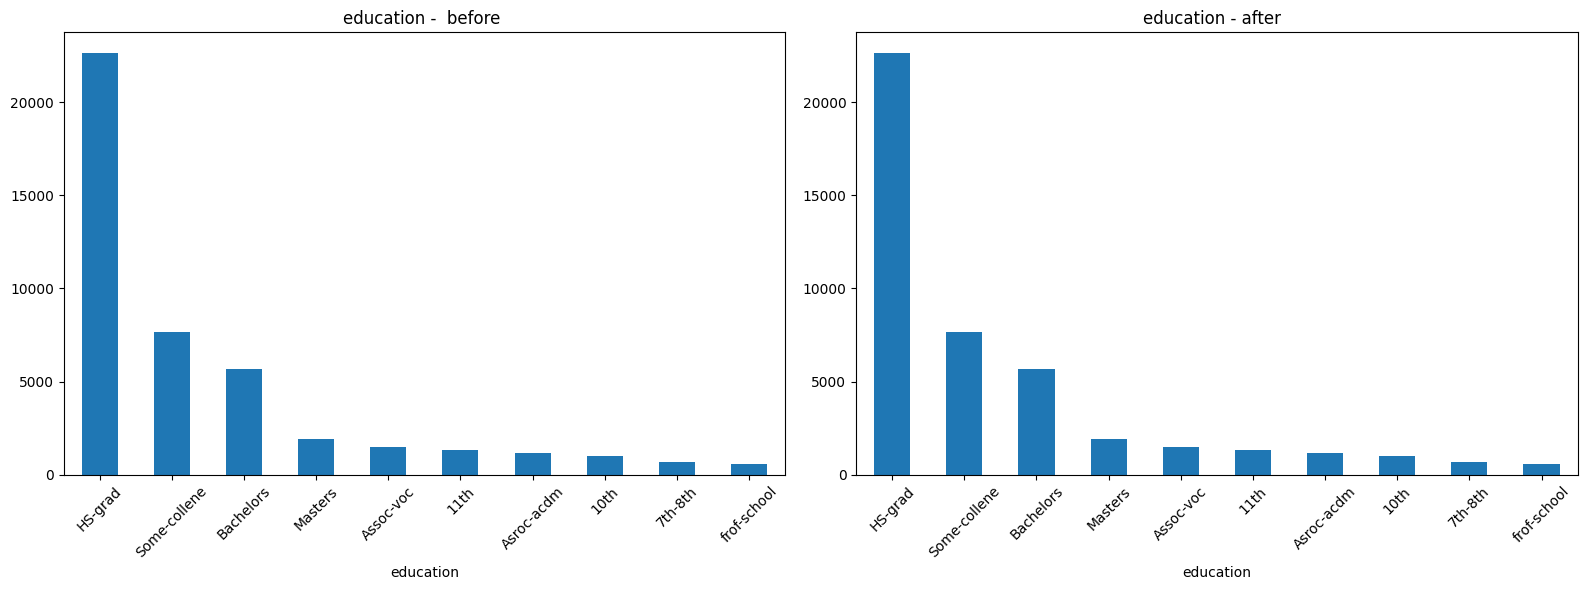

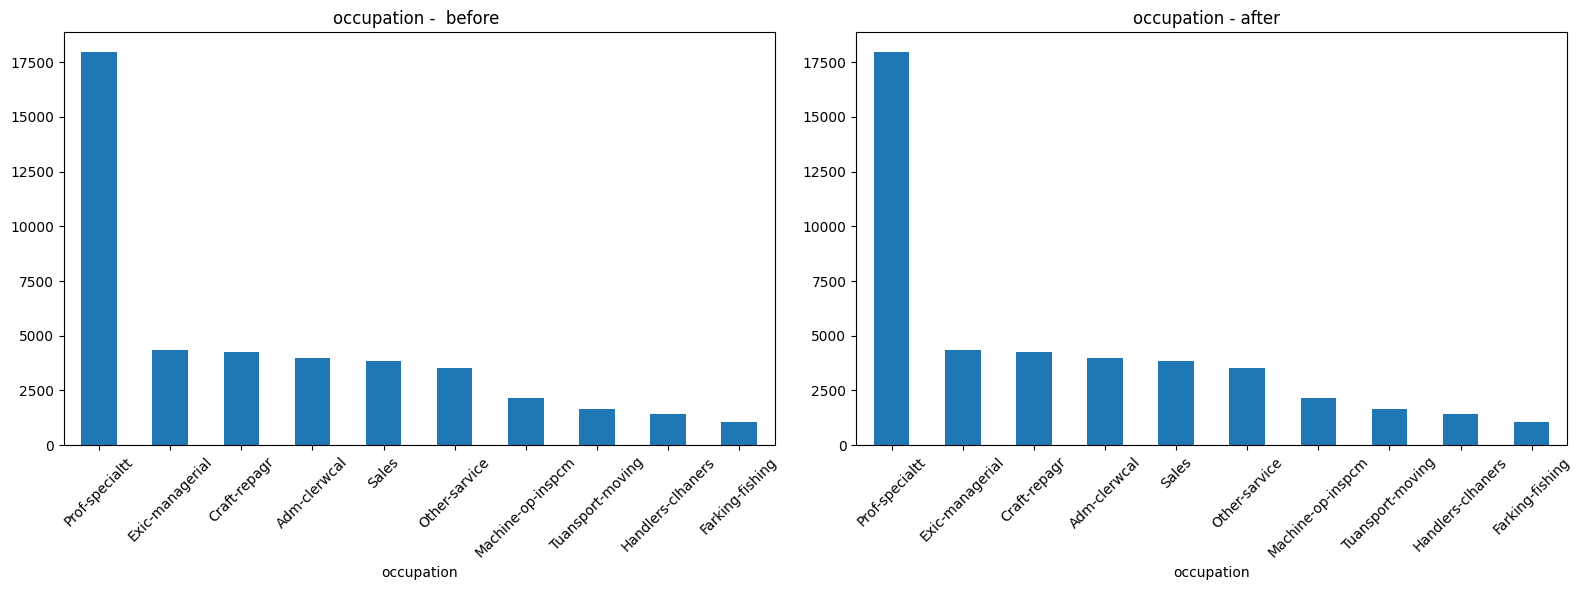

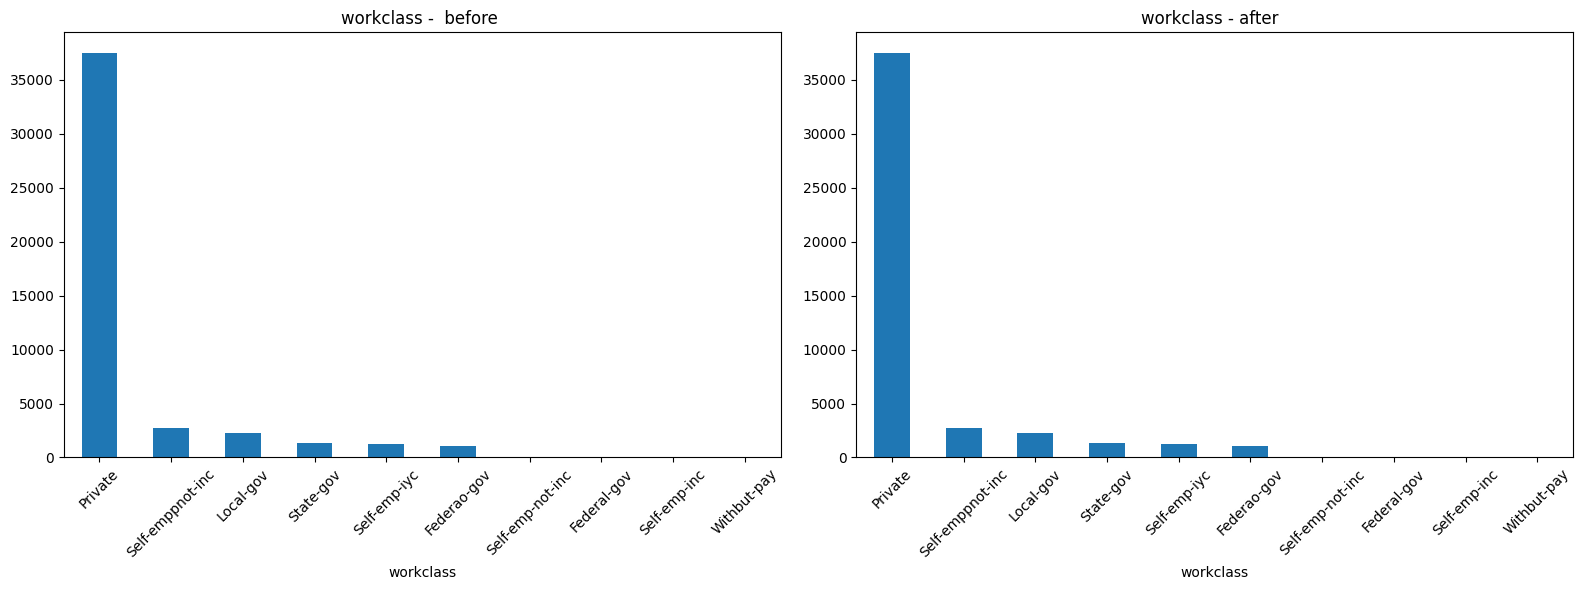

In [688]:
for col, mapping in corrections.items():
    adults_clean[col] = adults_clean[col].replace(mapping)

# تابع برای رسم نمودار مقایسه‌ای
def plot_comparison(column, before_df, after_df):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    before_df[column].value_counts().head(10).plot(kind='bar', ax=axes[0], title=f"{column} -  before ")
    after_df[column].value_counts().head(10).plot(kind='bar', ax=axes[1], title=f"{column} - after  ")
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

# رسم برای دو ستون مهم:
plot_comparison('education', adults_raw, adults_clean)
plot_comparison('occupation', adults_raw, adults_clean)
plot_comparison('workclass', adults_raw, adults_clean)


In [1]:
# لیست ستون‌های متنی مهم
columns_to_compare = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

# تابع رسم مقایسه‌ای قبل و بعد
def plot_before_after_comparison(col, raw_df, clean_df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    raw_df[col].value_counts().plot(kind='bar', ax=axes[0], title=f'{col} - Before', color='steelblue')
    clean_df[col].value_counts().plot(kind='bar', ax=axes[1], title=f'{col} - After', color='seagreen')
    
    axes[0].set_xlabel(col)
    axes[1].set_xlabel(col)
    
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# اجرای رسم برای تمام ستون‌ها
for col in columns_to_compare:
    plot_before_after_comparison(col, adults_raw, adults_clean)


NameError: name 'adults_raw' is not defined